# DATASETS

The following tutorial is a demonstration of the `DataSet` data structure which is frequently used in the following sections. `DataSet` plays the role of organizing data in different forms to make them able to be used by machine learning algorithms. Here we make the following datasets as examples:

- Fisher's Iris: Each item represents a flower, with four measurements: the length and the width of the sepals and petals. Each item/flower is categorized into one of three species: Setosa, Versicolor and Virginica.

- Zoo: The dataset holds different animals and their classification as "mammal", "fish", etc. The new animal we want to classify has the following measurements: 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 4, 1, 0, 1 (don't concern yourself with what the measurements mean).

- Restaurant: The restaurant example in Fig XX of the book. Each item in the dataset represents a condition of customers to make decisions. The target class of each item can be "yes" or "no", meaning whether to dine in this restaurant.

- Orings: The dataset holds different conditions of the night before each launch of the space shuttle. It is to predict the number of O-rings that will experience thermal distress for a given flight when the launch temperature is below freezing. The target class can be 0,1 or 2 meaning the number of oring failures.

To make use the datasets easier, we have written a class, DataSet, in learning.py. The tutorials found here make use of this class. Now let's have a look at how it works.

## Intro

A lot of the datasets we will work with are .csv files (although other formats are supported too). We have a collection of sample datasets ready to use on [aima-data](https://github.com/aimacode/aima-data/tree/a21fc108f52ad551344e947b0eb97df82f8d2b2b). Four examples are the datasets mentioned above (iris.csv, zoo.csv, orings.csv, and restaurant.csv). You can find plenty of datasets online, and a good repository of such datasets is [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets.php).

In such files, each line corresponds to one item/measurement. Each individual value in a line represents a feature and usually there is a value denoting the class of the item.

You can find the code for the dataset in `learning4e.py` or use the following code:

In [ ]:
%psource DataSet

## Importing a Dataset

There are multiple ways to import a dataset from the `learning4e` module. But first the necessary modules need to be imported:

In [12]:
import os, sys
sys.path = [os.path.abspath("../../")] + sys.path
from learning4e import *
from notebook4e import *

### Importing from aima-data

Dataset uploaded to aima-data can be imported as the following:

In [19]:
iris = DataSet(name="iris")

To check that we imported the correct dataset, we can do the following:

In [21]:
print(iris.examples[0])
print(iris.inputs)

[5.1, 3.5, 1.4, 0.2, 'setosa']
[0, 1, 2, 3]


Which correctly prints the first line in the csv file and the list of attribute indexes.

When importing a dataset, we can specify to exclude an attribute (for example, at index 1) by setting the parameter exclude to the attribute index or name

In [23]:
iris2 = DataSet(name="iris",exclude=[1])
print(iris2.inputs)

[0, 2, 3]


### Constructing your own dataset

In order to use self-defined datasets, you need to prepare the csv files for the datasets in the following format of the [iris example](https://github.com/aimacode/aima-data/blob/a21fc108f52ad551344e947b0eb97df82f8d2b2b/iris.csv). Then you can create your own dataset by specifying the correct dataset name, attributes, targets and exclusive attributes.

Here is how we create restaurant dataset in Figure 18.3 from restaurant.csv:

In [24]:
def RestaurantDataSet(examples=None):
    """Build a DataSet of Restaurant waiting examples. [Figure 18.3]"""
    return DataSet(name='restaurant', target='Wait', examples=examples,
                   attrnames='Alternate Bar Fri/Sat Hungry Patrons Price ' +
                   'Raining Reservation Type WaitEstimate Wait')

Please note that the dataset name should be the same to the csv file name in order to assist the program finding the correct file.

In [26]:
restaurant = RestaurantDataSet()
restaurant.inputs

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

## Class Attributes

Here we will demonstrate the attributes of a `DataSet` object and how they can be utilized. All the attributes can be specified when defining a dataset.

- <b>examples</b>: Holds the items of the dataset. Each item is a list of values. Could be indexed or sliced.

In [29]:
iris.examples[:3]

[[5.1, 3.5, 1.4, 0.2, 'setosa'],
 [4.9, 3.0, 1.4, 0.2, 'setosa'],
 [4.7, 3.2, 1.3, 0.2, 'setosa']]

- **attrs**: The indexes of the features (by default in the range of [0,f), where f is the number of features). For example, item[i] returns the feature at index i of item.

- **attrnames**: An optional list with attribute names. For example, item[s], where s is a feature name, returns the feature of name s in item.

- **target**: The attribute a learning algorithm will try to predict. By default the last attribute.

- **inputs**: This is the indexes of attributes without the target.

In [30]:
print("attrs:", iris.attrs)
print("attrnames (by default same as attrs):", iris.attrnames)
print("target:", iris.target)
print("inputs:", iris.inputs)

attrs: [0, 1, 2, 3, 4]
attrnames (by default same as attrs): ['sepal-len', 'sepal-width', 'petal-len', 'petal-width', 'class']
target: 4
inputs: [0, 1, 2, 3]


- **values**: A list of lists which holds the set of possible values for the corresponding attribute/feature. If initially None, it gets computed (by the function setproblem) from the examples.

For instance if we want to show the possible values of the first attribute:

In [31]:
print(iris.values[0])

[4.7, 5.5, 5.0, 4.9, 5.1, 4.6, 5.4, 4.4, 4.8, 4.3, 5.8, 7.0, 7.1, 4.5, 5.9, 5.6, 6.9, 6.5, 6.4, 6.6, 6.0, 6.1, 7.6, 7.4, 7.9, 5.7, 5.3, 5.2, 6.3, 6.7, 6.2, 6.8, 7.3, 7.2, 7.7]


- **name**: Name of the dataset.

In [32]:
print("name:", iris.name)

name: iris


- **source**: The source of the dataset (url or other). Not used in the code.

- **exclude**: A list of indexes to exclude from inputs. The list can include either attribute indexes (attrs) or names (attrnames).

## Helper Functions

We will now take a look at the auxiliary functions found in the class. These functions help modify a DataSet object to your needs.

- **sanitize**: Takes as input an example and returns it with non-input (target) attributes replaced by None. Useful for testing. Keep in mind that the example given is not itself sanitized, but instead a sanitized copy is returned.

Note that the function doesn't actually change the given example; it returns a sanitized copy of it.

In [33]:
print("Sanitized:",iris.sanitize(iris.examples[0]))
print("Original:",iris.examples[0])

Sanitized: [5.1, 3.5, 1.4, 0.2, None]
Original: [5.1, 3.5, 1.4, 0.2, 'setosa']


- **classes_to_numbers**: Maps the class names of a dataset to numbers. If the class names are not given, they are computed from the dataset values. Useful for classifiers that return a numerical value instead of a string.

For a lot of the classifiers in the book, classes should have numerical values. With this function we are able to map string class names to numbers.

In [34]:
print("Class of first example:",iris2.examples[0][iris2.target])
iris2.classes_to_numbers()
print("Class of first example:",iris2.examples[0][iris2.target])

Class of first example: setosa
Class of first example: 0


- **remove_examples**: Removes examples containing a given value. Useful for removing examples with missing values, or for removing classes (needed for binary classifiers).

Currently the iris dataset has three classes, setosa, virginica and versicolor. We want though to convert it to a binary class dataset (a dataset with two classes). The class we want to remove is "virginica". To accomplish that we will utilize the helper function remove_examples.

In [35]:
iris2 = DataSet(name="iris")

iris2.remove_examples("virginica")
print(iris2.values[iris2.target])

['setosa', 'versicolor']


- **find_means_and_deviations**: find the mean values and deviations of each class in the dataset.

In the iris example we have three classes, thus both means and deviations have the length of 3.

In [36]:
means, deviations = iris.find_means_and_deviations()
print(len(means), len(deviations))

3 3


In [37]:
print("Setosa feature means:", means["setosa"])
print("Versicolor mean for first feature:", means["versicolor"][0])

print("Setosa feature deviations:", deviations["setosa"])
print("Virginica deviation for second feature:",deviations["virginica"][1])

Setosa feature means: [5.006, 3.418, 1.464, 0.244]
Versicolor mean for first feature: 5.936
Setosa feature deviations: [0.3524896872134513, 0.38102439795469095, 0.17351115943644546, 0.10720950308167838]
Virginica deviation for second feature: 0.32249663817263746


## Dataset Visualization

Since the example datasets are used extensively in the code of the book, below we show the common ways to provide a visualized tool that helps in comprehending the dataset and thus how the algorithms work.

### Iris Visualization

We plot the dataset in a 3D space using matplotlib and the function show_iris from notebook.py. The function takes as input three parameters, i, j and k, which are indicises to the iris features, "Sepal Length", "Sepal Width", "Petal Length" and "Petal Width" (0 to 3). By default we show the first three features.

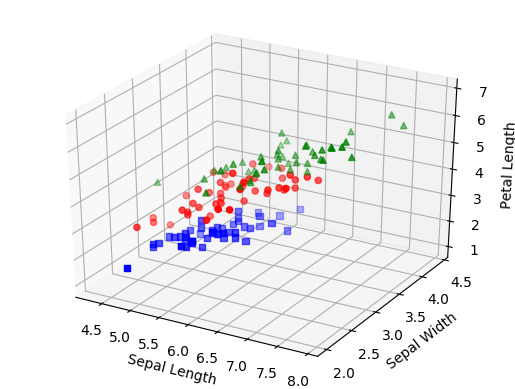

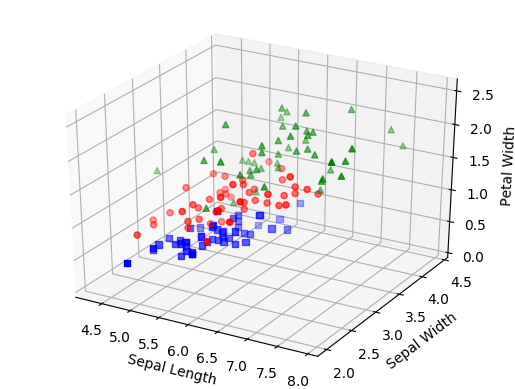

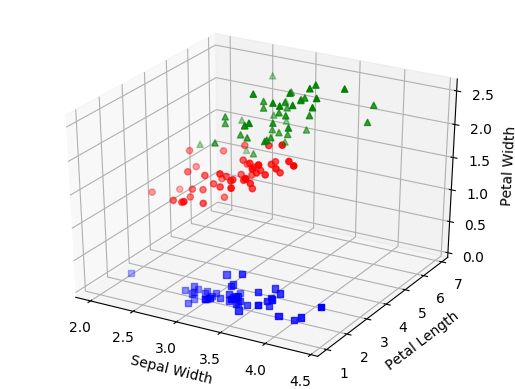

In [14]:
iris = DataSet(name="iris")

show_iris()
show_iris(0, 1, 3)
show_iris(1, 2, 3)